# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project 1: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MDEV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MDEV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MDEV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [10]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import visuals as vs # Supplementary code
from sklearn.cross_validation import ShuffleSplit

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MDEV']
features = data.drop('MDEV', axis = 1)
    
# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MDEV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MDEV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [11]:
# TODO: Minimum price of the data
minimum_price = np.min(prices)

# TODO: Maximum price of the data
maximum_price = np.max(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of all Boston homeowners who have a greater net worth than homeowners in the neighborhood.
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.

_Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MDEV'` or a **decrease** in the value of `'MDEV'`? Justify your answer for each._  
**Hint:** Would you expect a home that has an `'RM'` value of 6 be worth more or less than a home that has an `'RM'` value of 7?

**Answer: **

1) Increase in RM, increase in MDEV generally (with assumptions in place)
Increase in the value of RM alone, which implies an increase in the average number of rooms among homes in the neighborhood will likely lead to an increase in the value of MDEV (defined as the output price variable). Assuming that each room size complies with the minimum area required for people to live healthily by professional standards, or from a mathematical perspective, that (i) room sizes are always a positive value, (ii) and that every additional square feet is price at the minimum of either the last transacted price or average price psf over the a credible period (adjustment for speculation and huge price swing psf), every additional room would mean that the average house is bigger in square feet and assuming prices psf is expected to either mildly increase/ decrease (as good as constant), by simple multiplication, average house values will increase. 
However, even so, such assumptions have exceptions. In this case, while increase in average number of rooms is low, the increase in average size of house is susceptible to the irregularity in size of rooms across the different houses. Example, home A may have 2 rooms and 2 big halls(count as rooms) totalling 600 square feet while home B may have 5 small rooms totalling 400 square feet. In such a case, if houses are strictly price by per square feet, then increase in RM need not necessarily mean increase in MDEV while total number of rooms remain below a specific number.Of course, if we are assuming the number of rooms will increase infinitely, then this relationship will definitely hold especially when average number of rooms are high.
Also, the effect of the average number of rooms on MDEV may have a high chance of being nullified by other factors that are qualitative in nature, for example, the design and impression the property makes on different owners that have a non quantifiable premium. For instance, with reference to the previous example, home B may be easily priced higher than A should it find a buyer that likes more study rooms and find no uses for halls.

2) Increase in LSTAT, decrease in MDEV (with assumptions in place)
Increase in the value of LSTAT alone, which implies an increase in the average number of home owners in the state with a higher networth than home owners in the neighborhood, will likely decrease MDEV of the houses in the suburbs neighborhood. This can be explained by the impression that the neighborhood in the suburbs may be perceived as a poorer region and expect house price to be cheaper within the suburbs. A poorer region would imply poorer quality of lifetyle amenities, safety, and a lack of availability of good quality healthcare, education and transport facilities. Such factors would contribute to a lower premium that a buyer would be willing to fork out.  

3) Increase in PTRATIO, decrease in MDEV generally overtime 
Increase in the value of PTRATIO, which implies an increase students to teacher ration in neighborhood primary and secondary schools will quite likely result in a decrease in MDEV overtime. As the ratio increases, it implies that each student in classes of both levels will receive lesser attention from the teacher. Intuitively, in almost all educational instituitions worldwide, many of them charge a premium or pride themselves for having low students to teacher ratio, postulating that with a lower ratio, each student will receive more attention and guidance from the teacher and hence will be expected to perform better academically. Families looking to purchase new houses in the neighborhood may take this into consideration for the premium they wish to pay for staying within a neighborhood, based on the expected prestige and quality of education that can be offered within the schools in the neighborhood. Hence, when ratio increases, quality of education is expected to fall, families are less inclined to stay in the region or pay a premium on their houses, leading to a fall in expected MDEV prices.


----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 always fails to predict the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. *A model can be given a negative R<sup>2</sup> as well, which indicates that the model is no better than one that naively predicts the mean of the target variable.*

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [12]:
from sklearn.metrics import r2_score as r2

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2(y_true, y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |
*Would you consider this model to have successfully captured the variation of the target variable? Why or why not?* 

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [36]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


Model has a coefficient of determination, R^2, of 0.923.

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [37]:
from sklearn.cross_validation import train_test_split as tts

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = tts(features , prices, test_size=0.2, random_state=0 )

# Success
print "Training and testing split was successful."

Training and testing split was successful.


### Question 3 - Training and Testing
*What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?*  
**Hint:** What could go wrong with not having a way to test your model?

Benefit of splitting a dataset into training and testing subsets allows one to estimate the performance of an independent dataset and serves as a check on overfitting. When the model is use for prediction purpose, the best way to check on the accuracy and expected performance of a model is to use information and data that was not used in the process of creating the model itself. To run a model on a set of data which was used as a basis to create the model itself, will introduce many forms of biasness and it will not make any logical sense to evaluate the predicting ability of a model in this manner. Models must be tested on new and fresh information not used in the process of modelling in order for one to assess its predicting ability.

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

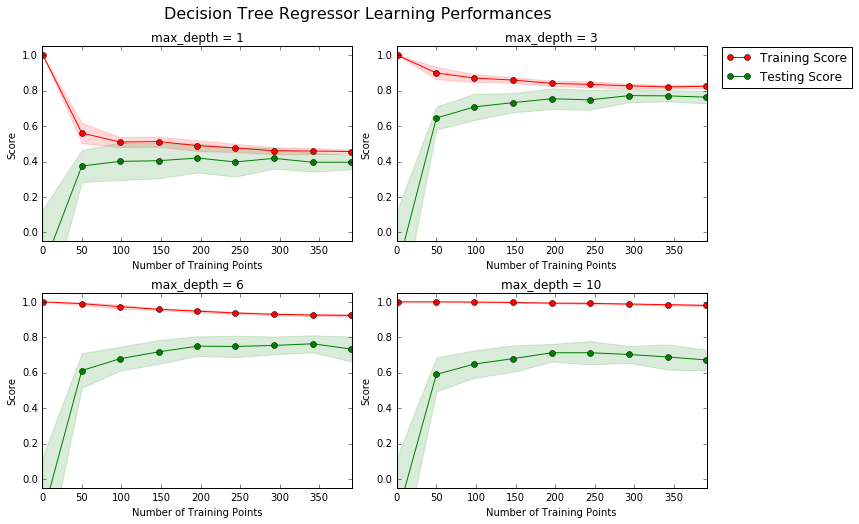

In [38]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
*Choose one of the graphs above and state the maximum depth for the model. What happens to the score of the training curve as more training points are added? What about the testing curve? Would having more training points benefit the model?*  
**Hint:** Are the learning curves converging to particular scores?

With reference to the bottom left diagram with a max depth of 6, the testing curve score experienced a explosive growth (growing at a increasing rate) when number of training points was increased from 0 to 50. Subsequently as more training points are added from 50 to 150, testing curve score was still growing at an increasing rate, although at a rate much lower than from 0 to 50. Growth rate of testing score seemingly pleateau off within a tight range of 0.7 to 0.8 as number of training points continues to grow to 300. Beyond 300 training points, testing curve score growth decreased in 3 out of 4 diagrams.

As more training points are added, training curve score decreases steadily but mildly. Generally, increasing training points from 0 to 50 will help enhance the testing score of all models drastically. Growth of the testing score seems to be quelled when training points reaches the range of 200 to 250. If the creator of the model faces resource constraints, he should cap the number of training points first at 100, while enhancing the complexity of the model, [since it can be seen that model with a max depth of 6 clearly outperforms model with max depth of 1 ( poor performance possibly due to OVERSIMPLIFICATION and HIGH BIAS) in terms of both testing n training score]. Once the creator has a model with good depth and complexity( from the above, sugegsts it to be between 3 to 6, since there is almost negligible growth in max depth of 10 when compared to 6- possible result of OVERFITTING), he could channel the remaining resource into expanding the tranining points to the regions of 200 and 250. Any expansion beyond, may be futile on increasing the performance of the model, which will represent resources that were not optimized. 

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

Run the code cell below and use this graph to answer the following two questions.

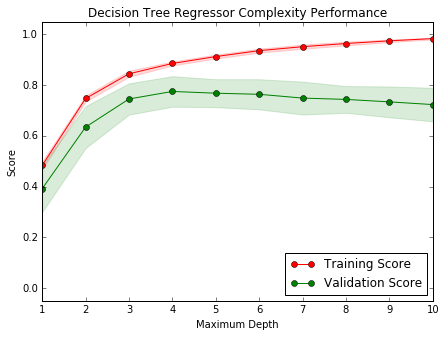

In [39]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
*When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?*  
**Hint:** How do you know when a model is suffering from high bias or high variance?

When the model is trained with a maximum depth of 1, it suffers from high bias(oversimplification) and when model is trained with max depth of 10, it suffers from high variance overfitting). At maximum depth of 1, both training and validation score are low (at levels of 0.5 and 0.4)- justifies the conclusion of oversimplification. At maximum depth of 10, there is a difference of 0.3 in score between training and validation, namely 1.0 and 0.7 respectively, which is a big difference(hence variance) relative to the difference seen when maximum depth was 1,where we observed that both scores had a variance of 0.1 only.  

### Question 6 - Best-Guess Optimal Model
*Which maximum depth do you think results in a model that best generalizes to unseen data? What intuition lead you to this answer?*

The maximum depth which I believe is ideal for a model that best generalizes unseen data would be 3. Based on the previous few examples we have evaluated, smallest gap between training and testing sets can be observed when max depth is 3, meaning at that depth level, the model generalizes best. But if i am given an option to guess a range instead, I believe a range of max depth between values of 3 to 5 will be the most accurate. 

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
*What is the grid search technique and how it can be applied to optimize a learning algorithm?*

Grid search technique is a way of systematically working through multiple combinations of parameter tunes, cross-validating as it goes to determine which tune gives the best performance. 

Parameters are first defined, followed by a generation of a grid.
An algorithm will be chosen
A classifier will be created. The parameters and algorithm are passed through the classifier which produces a grid of optimized parameters to try. 
The fit function then tries all the parameter combinations and produce a fitted classifier that is tuned to the optimal parameter combination. 

### Question 8 - Cross-Validation
*What is the k-fold cross-validation training technique? What benefit does this technique provide for grid search when optimizing a model?*  
**Hint:** Much like the reasoning behind having a testing set, what could go wrong with using grid search without a cross-validated set?

When we choose the amount of data to be allocated into training and testing sets, it is difficult to determine the exact number of datapoints for each set without running the risk of making big trade offs and hence not optimizing the decision making process and the test result. 

K- fold cross validation technique firstly partitions the data into k number of data sets with equal number of datapoints in each group,  and then run the intended training process as k separate number of experiements with similar steps for each of the K test, before we finally average all the test results across the k number of experiments. Such a technique will lead to higher accuracy of test result but requires a longer training time and run time. 

Cross validation helps to automate the guess and check method usually involved in optimizing paramaters in a model to produce a prime paramater tune. This enables the grid search to perform even more efficiently and accurately when the initial data set is already optmized in terms of accuracy. If cross validation is left out, the results of grid search will not be the most accurate.



### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [53]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.metrics import make_scorer as ms
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.grid_search import GridSearchCV as GSCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DTR(random_state=0)

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth': (1,2,3,4,5,6,7,8,9,10)}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = ms(performance_metric)

    # TODO: Create the grid search object
    grid = GSCV(cv= cv_sets, estimator = regressor, param_grid = params, scoring = scoring_fnc)
    
    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model
_What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?_  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [55]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 4 for the optimal model.


Parameter 'max_depth' is 4 for the optimal model.

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Household net worth (income) | Top 34th percent | Bottom 45th percent | Top 7th percent |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |
*What price would you recommend each client sell his/her home at? Do these prices seem reasonable given the values for the respective features?*  
**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  

Run the code block below to have your optimized model make predictions for each client's home.

In [56]:
# Produce a matrix for client data
client_data = [[5, 34, 15], # Client 1
               [4, 55, 22], # Client 2
               [8, 7, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

Predicted selling price for Client 1's home: $324,240.00
Predicted selling price for Client 2's home: $189,123.53
Predicted selling price for Client 3's home: $942,666.67


Based on the model, these are the suggested price to sell the various houses:
Predicted selling price for Client 1's home: $324,240.00
Predicted selling price for Client 2's home: $189,123.53
Predicted selling price for Client 3's home: $942,666.67

Initial statistics derived from Massachusetts houses historical price data:
Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13

These prices are within an acceptable statistical range when compared with the initial statistics on the historical prices of houses in Massachusetts. We will do a comparison of the various scenarios amongst themselves with supporting data below:


Upon investigation of the csv file: 

Features of the house sold at MAXIMUM price within the dataset: 
RM      LSTAT   PTRATIO   Price
8.398	5.91	13	      1024800


Client 3 has the home with the best features: 
1)low student to teacher ratio=[12] 
2)least number of rooms=[4] 
3)highest networth, means potentially contributing to a lower LSTAT (but much weaker point here)

Since the model estimate Client 3's home to be priced near the maximum price in the csv file, we attempt to justify the price estimated by the model with this case study. All the features in Client 3's house is comparable to that of the house sold at the maximum value and hence, the price estimation is reasonable.



Features of the house sold at MEDIAN price within the dataset: 
RM      LSTAT   PTRATIO   Price
5.885	8.79	18.9	  438900

Client 1 has the home with MODERATE features: 
1)moderate student to teacher ratio=[15] 
2)moderate number of rooms=[5] 
3)moderate networth, (top 34 percent) means potentially contributing to a moderate LSTAT (but much weaker point here)

Data above suggest that the features of a median price home consists of approximately 6 rooms, with a PT ratio of approximately 19. The model estimated selling price for this house at 324k, below the median price. When comparing the the features, we can understand why since Client 1's house is 1 room smaller. To exactly determine if this estimation is accurate would be difficult as i believe that each of these features and factors should be given different weights on how much it influences the model in estimating the price. But, based on the current data available and assumptions we hold, this estimation is also justifiably reasonable.


Features of the house sold at MINIMUM price within the dataset: 
RM      LSTAT   PTRATIO   Price
5.453	30.59	20.2	  105000

Client 2 has the home with the worst features: 
1)high student to teacher ratio=[22] 
2)least number of rooms=[4] 
3)lowest networth,(bottom 45 percent) which means potentially contributing to a higher LSTAT (but much weaker point here)

Since the model estimate Client 2's home to be priced near the minimum price in the csv file, at 189k, we thus make a comparision of the features of the home in these 2 cases. Comparing Client 2's home to the house which fetched the minimum price in the historical dataset, we can understand why the model made this estimation since the client's house has a comparably low PTRATIO and similar expected LSTAT and also has the smallest number of rooms amongst the 3 clients. That being said, i beleive that when such a raw comparison is being made, should the number of rooms have a greater weightage in the model, Client 2's house should be priced lower than 105000 assuming that the historical price is an accurate benchmark. 

In the above method which I used to compare and justify the evaluation, a weakness with such an approach is that I was not able to determine when were these houses sold due to lack of information on the exact date and year when the transaction took place. The year of sale would have contributed to big price differences due to market cycles which i will explain below.

In conclusion, all 3 estimated and recommended selling price are justifiably reasonable. But I personally believe that Client 1 and Client 2's house estimation could be further refined. The estimation may not be as precise because certain key factors which I believe contributes heavily to housing prices are not added into the model. Factors such as market conditions/ cycles were instrumental but not evaluated in this experiment. 


### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with the data it's trained on.

In [57]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $324,240.00
Trial 2: $302,400.00
Trial 3: $346,500.00
Trial 4: $420,622.22
Trial 5: $302,400.00
Trial 6: $411,931.58
Trial 7: $344,750.00
Trial 8: $407,232.00
Trial 9: $352,315.38
Trial 10: $316,890.00

Range in prices: $118,222.22


### Question 11 - Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

As partially explained in the previous section above, this model lacks factors that I believe are crucial in predicting housing prices. Using data from 1978 to predict prices is also in my opinion, not a good practice and will not result in a good model. A possible reason would be that, the housing rules, laws and trends in the 1970s are vastly different from what it is now. Features such as market cycles and sentiment also have a huge part to play. For example, house prices in the same region before the mortagage crisis in 2007 would possibly cost 2 to 3 times more than another house just 2 years later. When there are such black swan events, we should also consider removing them as they would skew prices. That being said, a model that takes them into account and yet could still produce a better estimate is definitely the more optimal approach to adopt. 

Based on the range in prices we got from the algorithm one step earlier, the model can be seen to be not robust as it was not able to produce a sufficiently consistent estimate. Prices are changing by 10 percent from trial to trial when compared to the maximum price of a house. Such a margin of error is not acceptable especially when sometimes, this value itself is worth the entire profit margin of a buyer/seller. 

Data collected in Boston would not be as applicable to a rural city based on qualitative factors that play a big part in determining the selling price of houses. The concept that prices wil differ vastly due to qualitative aspects can be observed worldwide. 

For instance, here in Singapore, even when the most rural part of the country is still considered to be part of a city state and the city itself, properties within the central/town can command a premium of up to 30 to 50 percent over those around the borders of the countries. Properties that are within 1km radius from train service or school facilities also command a premium of 10 percent over counterparts that are merely another 1km away. 

Thus this model would be accurate consistently in a real world setting, and should be further refined should it be considered for usage.

In [ ]:
#Thank you for reviewing my work. Cheers!

In [ ]:
#THE END